In [78]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [79]:
df = pd.read_stata("data/5pct_sample_2019_10.dta")

In [80]:
df.head()

,date,shop_code,region,price,item
0,323,188,Catalogue collections,52.000000,349
1,326,188,Catalogue collections,77.000000,349
2,332,188,Catalogue collections,49.000000,349
3,328,203,Catalogue collections,37.000000,349
4,337,203,Catalogue collections,39.990002,349


In [81]:
selecteditems= pd.read_csv("data/selecteditems.csv")

In [82]:
selecteditems.head(5)

,quote_date,item_id,name,date,median,price,p,keep,date2,date3,newDate,_merge
0,198802,212511.0,C. Lettuce,1.0,0.776667,10.0,0.677500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
1,198802,212511.0,C. Lettuce,1.0,0.776667,1020.0,0.012917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
2,198802,212511.0,C. Lettuce,1.0,0.776667,2030.0,0.030000,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
3,198802,212511.0,C. Lettuce,1.0,0.776667,3040.0,0.023333,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
4,198802,212511.0,C. Lettuce,1.0,0.776667,4050.0,0.032917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)


In [83]:
selecteditems.isnull().sum()

quote_date    0
item_id       2
name          2
date          2
median        2
price         2
p             2
keep          2
date2         0
date3         0
newDate       0
_merge        0
dtype: int64

In [84]:
selecteditems.count()

quote_date    13898
item_id       13896
name          13896
date          13896
median        13896
price         13896
p             13896
keep          13896
date2         13898
date3         13898
newDate       13898
_merge        13898
dtype: int64

In [85]:
selecteditems[selecteditems["date"].isna()]

,quote_date,item_id,name,date,median,price,p,keep,date2,date3,newDate,_merge
13896,198808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-08-1988,01-08-1988,1988-08-01,using only (2)
13897,198902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-02-1989,01-02-1989,1989-02-01,using only (2)


We have to delete these rows because they don't have any value 

In [86]:
selecteditems = selecteditems.dropna()

In [87]:
selecteditems.isnull().sum()

quote_date    0
item_id       0
name          0
date          0
median        0
price         0
p             0
keep          0
date2         0
date3         0
newDate       0
_merge        0
dtype: int64

In [88]:
selecteditems.count()

quote_date    13896
item_id       13896
name          13896
date          13896
median        13896
price         13896
p             13896
keep          13896
date2         13896
date3         13896
newDate       13896
_merge        13896
dtype: int64

In [89]:
selecteditems["date"] = selecteditems["date"].astype(int)

In [90]:
selecteditems["item_id"] = selecteditems["item_id"].astype(int)

In [91]:
selecteditems.head()

,quote_date,item_id,name,date,median,price,p,keep,date2,date3,newDate,_merge
0,198802,212511,C. Lettuce,1,0.776667,10.0,0.677500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
1,198802,212511,C. Lettuce,1,0.776667,1020.0,0.012917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
2,198802,212511,C. Lettuce,1,0.776667,2030.0,0.030000,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
3,198802,212511,C. Lettuce,1,0.776667,3040.0,0.023333,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
4,198802,212511,C. Lettuce,1,0.776667,4050.0,0.032917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)


In [92]:
selecteditems["name"].value_counts()

C. Lettuce        3537
D. Cigarettes     3528
B. Men's socks    3528
A. Pub Meal       3303
Name: name, dtype: int64

In [93]:
items = pd.read_csv("data/items_2019_10.csv")

In [94]:
items.head()

,item,item_id,description
0,1,210101,LARGE LOAF-WHITE-SLICED-800G
1,2,210102,LARGE LOAF-WHITE-UNSLICED-800G
2,3,210105,LARGE WHOLEMEAL LOAF-UNSLICED
3,4,210106,SIX BREAD ROLLS-WHITE/BROWN
4,5,210107,"BROWN LOAF,400G,SLICED-GRAN"


In [95]:
items[items["item_id"]== 212511]

,item,item_id,description
249,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH


In [96]:
lettuce_data = df[df["item"] == 250]

In [97]:
lettuce_data = lettuce_data.merge(items, on="item")

In [98]:
lettuce_data.head()

,date,shop_code,region,price,item,item_id,description
0,23,1,London,0.99,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
1,119,1,London,0.80,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
2,194,1,London,0.59,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
3,263,2,London,0.79,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
4,102,4,London,0.42,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH


In [99]:
lettuce_data = lettuce_data.sort_values(by=["date"] )

In [100]:
lettuce_data.head()

,date,shop_code,region,price,item,item_id,description
2499,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
1490,1,7,East Anglia,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
1492,1,10,East Anglia,0.70,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
2503,1,2,Yorkshire & Humber,0.85,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH
2618,1,45,Yorkshire & Humber,0.79,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH


In [101]:
lettuce_data = lettuce_data.merge(selecteditems, on=['date','item_id'],suffixes = ('_lettuce','_selected'))

In [102]:
lettuce_data.head(25)

,date,shop_code,region,price_lettuce,item,item_id,description,quote_date,name,median,price_selected,p,keep,date2,date3,newDate,_merge
0,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,10.0,0.677500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
1,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,1020.0,0.012917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
2,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,2030.0,0.030000,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
3,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,3040.0,0.023333,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
4,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,4050.0,0.032917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
5,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,5060.0,0.034583,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
6,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,6070.0,0.050417,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
7,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,7080.0,0.072500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
8,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,8090.0,0.042917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)
9,1,7,East Anglia,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,10.0,0.677500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3)


In [103]:
lettuce_data.shape

(39726, 17)

In [104]:
lettuce_data[lettuce_data.duplicated()]

,date,shop_code,region,price_lettuce,item,item_id,description,quote_date,name,median,price_selected,p,keep,date2,date3,newDate,_merge


In [105]:
lettuce_data.isnull().sum()

date              0
shop_code         0
region            0
price_lettuce     0
item              0
item_id           0
description       0
quote_date        0
name              0
median            0
price_selected    0
p                 0
keep              0
date2             0
date3             0
newDate           0
_merge            0
dtype: int64

In [106]:
lettuce_data['description'].unique()

array(['FRESH VEG-LETTUCE-ICEBERG-EACH'], dtype=object)

In [107]:
lettuce_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39726 entries, 0 to 39725
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date            39726 non-null  int16   
 1   shop_code       39726 non-null  int16   
 2   region          39726 non-null  category
 3   price_lettuce   39726 non-null  float32 
 4   item            39726 non-null  int16   
 5   item_id         39726 non-null  int64   
 6   description     39726 non-null  object  
 7   quote_date      39726 non-null  int64   
 8   name            39726 non-null  object  
 9   median          39726 non-null  float64 
 10  price_selected  39726 non-null  float64 
 11  p               39726 non-null  float64 
 12  keep            39726 non-null  float64 
 13  date2           39726 non-null  object  
 14  date3           39726 non-null  object  
 15  newDate         39726 non-null  object  
 16  _merge          39726 non-null  object  
dtypes: category(

In [108]:
lettuce_data['newDate'] = lettuce_data['newDate'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
lettuce_data['Year'] = lettuce_data['newDate'].dt.year
lettuce_data['Month'] = lettuce_data['newDate'].dt.month

In [109]:
lettuce_data.head()

,date,shop_code,region,price_lettuce,item,item_id,description,quote_date,name,median,price_selected,p,keep,date2,date3,newDate,_merge,Year,Month
0,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,10.0,0.677500,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3),1988,2
1,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,1020.0,0.012917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3),1988,2
2,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,2030.0,0.030000,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3),1988,2
3,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,3040.0,0.023333,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3),1988,2
4,1,1,Yorkshire & Humber,0.69,250,212511,FRESH VEG-LETTUCE-ICEBERG-EACH,198802,C. Lettuce,0.776667,4050.0,0.032917,1.0,01-02-1988,01-02-1988,1988-02-01,matched (3),1988,2


In [110]:
#columns to drop
cols = ['quote_date','date2','date3','keep','item','item_id','description','name','_merge']

In [111]:
lettuce_data.drop(columns = cols, axis = 1, inplace = True)

In [112]:
lettuce_data.head()

,date,shop_code,region,price_lettuce,median,price_selected,p,newDate,Year,Month
0,1,1,Yorkshire & Humber,0.69,0.776667,10.0,0.677500,1988-02-01,1988,2
1,1,1,Yorkshire & Humber,0.69,0.776667,1020.0,0.012917,1988-02-01,1988,2
2,1,1,Yorkshire & Humber,0.69,0.776667,2030.0,0.030000,1988-02-01,1988,2
3,1,1,Yorkshire & Humber,0.69,0.776667,3040.0,0.023333,1988-02-01,1988,2
4,1,1,Yorkshire & Humber,0.69,0.776667,4050.0,0.032917,1988-02-01,1988,2


## Explatory Data Analysis

Number of regions

In [113]:
print('Number of regions:', lettuce_data['region'].nunique())

Number of regions: 13


In [114]:
lettuce_data['region'].value_counts()

South East               5436
London                   4302
North West               3915
Yorkshire & Humber       3591
Scotland                 3501
West Midlands            3330
South West               3303
East Midlands            3060
East Anglia              2997
North                    2232
Wales                    2205
Northern Ireland         1395
99                        459
Catalogue collections       0
Name: region, dtype: int64

Average lettuce price per year

In [116]:
lettuce_data.groupby('Year')['price_lettuce'].median()

Year
1988    0.700
1989    0.785
1990    0.835
1991    0.695
1992    0.690
1993    0.645
1994    0.650
1995    0.690
1996    0.580
1997    0.600
1998    0.590
1999    0.590
2000    0.500
2001    0.650
2002    0.650
2003    0.750
2004    0.650
2005    0.690
2006    0.750
2007    0.790
2008    0.850
2009    0.870
2010    0.950
2011    0.890
2012    1.000
2013    1.000
2014    0.750
2015    0.550
2016    0.500
2017    0.500
2018    0.600
2019    0.620
Name: price_lettuce, dtype: float32

Minimum price per year

In [117]:
lettuce_data.groupby('Year')['price_lettuce'].min()

Year
1988    0.45
1989    0.45
1990    0.30
1991    0.30
1992    0.35
1993    0.22
1994    0.29
1995    0.35
1996    0.25
1997    0.25
1998    0.29
1999    0.35
2000    0.25
2001    0.25
2002    0.38
2003    0.39
2004    0.25
2005    0.39
2006    0.39
2007    0.40
2008    0.37
2009    0.39
2010    0.40
2011    0.39
2012    0.50
2013    0.39
2014    0.39
2015    0.34
2016    0.39
2017    0.39
2018    0.42
2019    0.25
Name: price_lettuce, dtype: float32

Maximum price per year

In [118]:
lettuce_data.groupby('Year')['price_lettuce'].max()

Year
1988    1.20
1989    1.09
1990    1.19
1991    1.25
1992    1.20
1993    1.29
1994    0.95
1995    1.04
1996    1.59
1997    1.25
1998    0.99
1999    1.35
2000    0.99
2001    1.49
2002    1.20
2003    1.79
2004    1.40
2005    1.80
2006    1.20
2007    1.49
2008    1.50
2009    1.50
2010    1.95
2011    1.32
2012    1.99
2013    1.50
2014    1.29
2015    1.29
2016    1.50
2017    1.20
2018    1.50
2019    1.29
Name: price_lettuce, dtype: float32

In [119]:
average_price = lettuce_data.groupby(['price_lettuce', 'Year'], as_index = False)['price_lettuce'].median()

Median price distribution per year of lettuce

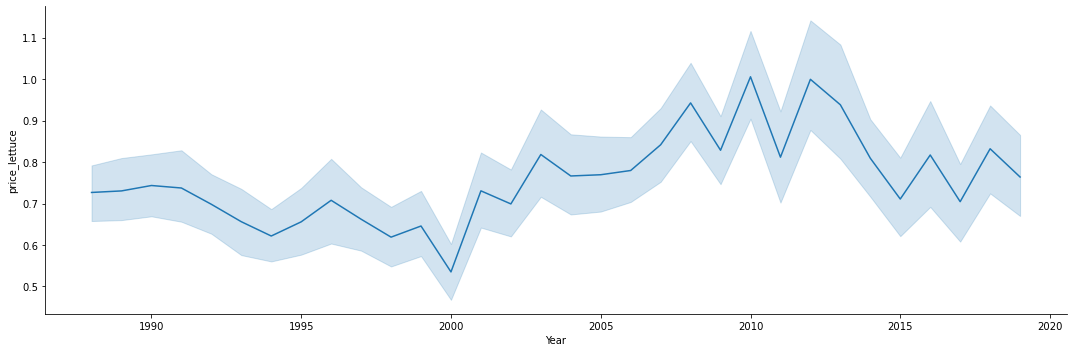

In [120]:
sns.relplot(kind = 'line', data = average_price, 
            x = 'Year', y = 'price_lettuce', aspect=3);

Median price across all regions

<AxesSubplot:xlabel='region'>

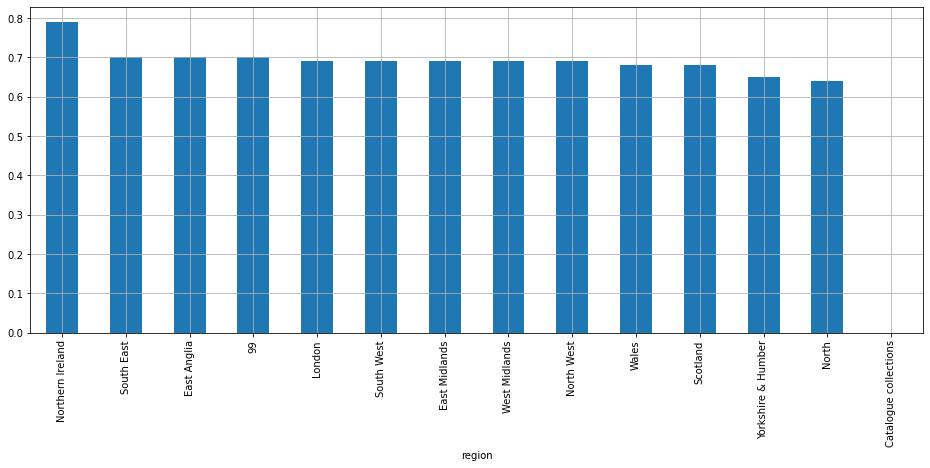

In [121]:
lettuce_data.groupby(lettuce_data['region'])['price_lettuce'].median().sort_values(ascending = False).plot(
    kind = "bar",grid = True, figsize = (16,6))

- 2008 Financial crush
- 2016 EU referendum
- 2019 Covid

In [122]:
lettuce_data_2008 = lettuce_data[lettuce_data['Year'] == 2008].copy()


lettuce_data_2008_price_per_month = lettuce_data_2008.groupby(['region','Month'], as_index=False)['price_lettuce'].median()

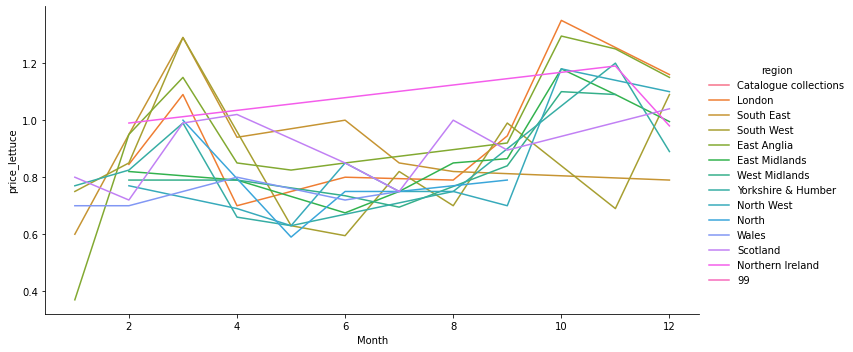

In [123]:
sns.relplot(kind='line', data = lettuce_data_2008_price_per_month, x = 'Month', y = 'price_lettuce', hue = 'region', aspect = 2);

In [ ]:
print('Number of shops:', lettuce_data['shop_code'].nunique())

In [ ]:
lettuce_data.head()

In [124]:

lettuce_data_2008_price_per_month = lettuce_data_2008.groupby(['Month'], as_index=False)['price_lettuce'].median()

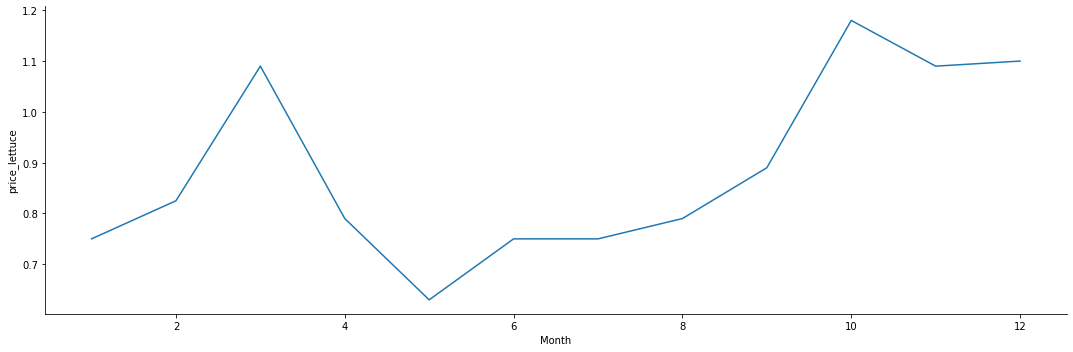

In [125]:
sns.relplot(kind='line', data = lettuce_data_2008_price_per_month, x = 'Month', y = 'price_lettuce',  aspect = 3);

In [126]:
lettuce_data_2016 = lettuce_data[lettuce_data['Year'] == 2016].copy()

lettuce_data_2016_price_per_month = lettuce_data_2016.groupby(['Month'], as_index=False)['price_lettuce'].median()

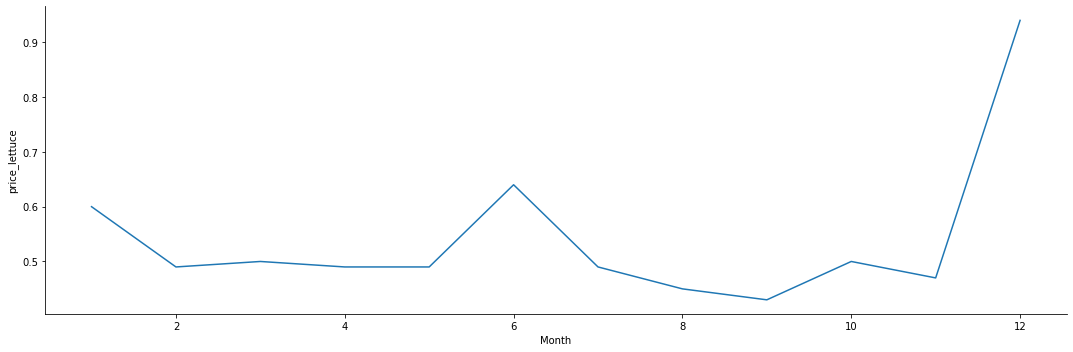

In [127]:
sns.relplot(kind='line', data = lettuce_data_2016_price_per_month, x = 'Month', y = 'price_lettuce',  aspect = 3);

In [128]:
lettuce_data_2019 = lettuce_data[lettuce_data['Year'] == 2019].copy()

lettuce_data_2019_price_per_month = lettuce_data_2019.groupby(['Month'], as_index=False)['price_lettuce'].median()

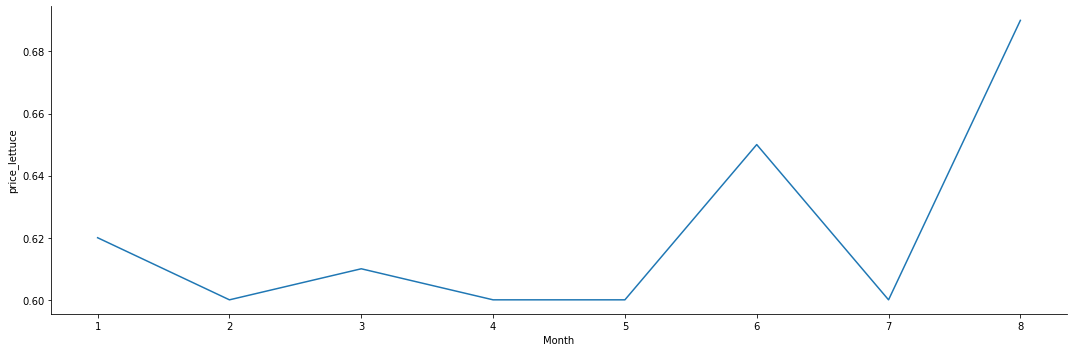

In [129]:
sns.relplot(kind='line', data = lettuce_data_2019_price_per_month, x = 'Month', y = 'price_lettuce',  aspect = 3);

In [ ]:
lettuce_data[lettuce_data["region"]==99]

In [ ]:
lettuce_data.duplicated().value_counts()